In [12]:
# Importowanie bibliotek
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Wczytanie danych
data = pd.read_csv("D:\SAGES\project\Energy_consumption.csv")

In [14]:
# Konwersja kolumny 'Timestamp' na format datetime i ustawienie jej jako indeks
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.set_index('Timestamp', inplace=True)

In [15]:
# Eksploracja danych
print("Podstawowe informacje o danych:")
print(data.info())
print("\nPodgląd danych:")
print(data.head())

Podstawowe informacje o danych:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2022-01-01 00:00:00 to 2022-02-11 15:00:00
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        1000 non-null   float64
 1   Humidity           1000 non-null   float64
 2   SquareFootage      1000 non-null   float64
 3   Occupancy          1000 non-null   int64  
 4   HVACUsage          1000 non-null   object 
 5   LightingUsage      1000 non-null   object 
 6   RenewableEnergy    1000 non-null   float64
 7   DayOfWeek          1000 non-null   object 
 8   Holiday            1000 non-null   object 
 9   EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 85.9+ KB
None

Podgląd danych:
                     Temperature   Humidity  SquareFootage  Occupancy  \
Timestamp                                                               
2022-01-01 00:00:0

In [16]:
# Sprawdzanie braków danych
print("\nBraki danych:")
print(data.isnull().sum())


Braki danych:
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
DayOfWeek            0
Holiday              0
EnergyConsumption    0
dtype: int64


In [17]:
# Uzupełnianie braków danych (jeśli występują)
data.fillna(method='ffill', inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_36652\711233711.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [18]:
# Przygotowanie danych szeregów czasowych
# Zakładam, że kolumna 'Energy' zawiera zapotrzebowanie na energię
energy_series = data['EnergyConsumption']

In [19]:
# Podział na dane treningowe i testowe
train_size = int(len(energy_series) * 0.8)
train_data = energy_series[:train_size]
test_data = energy_series[train_size:]

In [20]:
# Dopasowanie modelu ARIMA
# Wstępnie zakładamy parametry ARIMA(p, d, q) = (5, 1, 0) jako przykład
# Można je dostroić za pomocą analizy ACF/PACF
model = ARIMA(train_data, order=(5, 1, 0))
fitted_model = model.fit()

c:\Users\DELL\anaconda333\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\DELL\anaconda333\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\DELL\anaconda333\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [21]:
# Wyświetlenie podsumowania modelu
print("\nPodsumowanie modelu ARIMA:")
print(fitted_model.summary())


Podsumowanie modelu ARIMA:
                               SARIMAX Results                                
Dep. Variable:      EnergyConsumption   No. Observations:                  800
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2873.229
Date:                Tue, 26 Nov 2024   AIC                           5758.459
Time:                        14:34:59   BIC                           5786.559
Sample:                    01-01-2022   HQIC                          5769.254
                         - 02-03-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8574      0.035    -24.379      0.000      -0.926      -0.788
ar.L2         -0.7217      0.044    -16.543      0.000      -0.807      -0.636
ar.L3         -0.5912   

In [22]:
# Predykcja na zbiorze testowym
start = test_data.index[0]
end = test_data.index[-1]
predictions = fitted_model.predict(start=start, end=end, dynamic=False)

In [23]:
# Obliczenie metryk
mae = mean_absolute_error(test_data, predictions)
mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)

In [24]:
print("\nWyniki modelu:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Wyniki modelu:
Mean Absolute Error (MAE): 6.47
Mean Squared Error (MSE): 63.76
Root Mean Squared Error (RMSE): 7.99


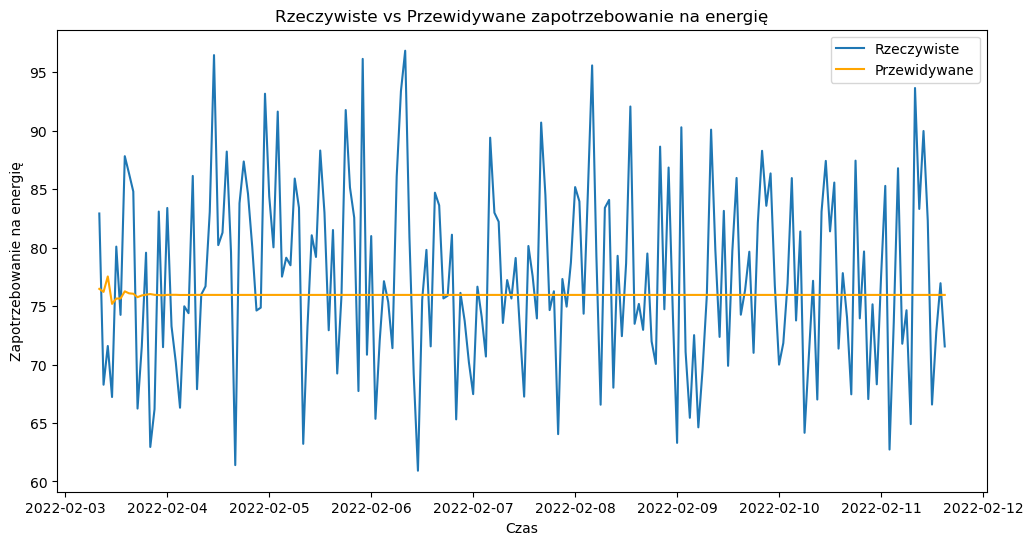

In [25]:
# Wykres rzeczywiste vs przewidywane
plt.figure(figsize=(12, 6))
plt.plot(test_data, label='Rzeczywiste')
plt.plot(predictions, label='Przewidywane', color='orange')
plt.title("Rzeczywiste vs Przewidywane zapotrzebowanie na energię")
plt.xlabel("Czas")
plt.ylabel("Zapotrzebowanie na energię")
plt.legend()
plt.show()

In [26]:
# Opcjonalnie: zapisanie wyników do pliku
output = pd.DataFrame({'Timestamp': test_data.index, 'Actual': test_data, 'Predicted': predictions})
output.to_csv('arima_energy_predictions.csv', index=False)
print("\nPredykcje zapisane do pliku 'arima_energy_predictions.csv'")


Predykcje zapisane do pliku 'arima_energy_predictions.csv'
